In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data=pd.read_csv("iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.shape

(150, 5)

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.groupby("species").size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
cols=data.columns
data["total"]=data[cols].sum(axis=1)
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species  total
0           5.1          3.5           1.4          0.2  Iris-setosa   10.2
1           4.9          3.0           1.4          0.2  Iris-setosa    9.5
2           4.7          3.2           1.3          0.2  Iris-setosa    9.4
3           4.6          3.1           1.5          0.2  Iris-setosa    9.4
4           5.0          3.6           1.4          0.2  Iris-setosa   10.2


C:\Users\yuvarani\AppData\Local\Temp\ipykernel_27344\3529255650.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data["total"]=data[cols].sum(axis=1)


In [12]:
data["sepal_length"].mean()

5.843333333333335

In [13]:
data["species"].mode()


0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
Name: species, dtype: object

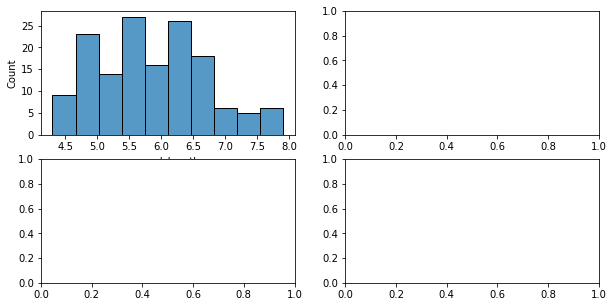

In [14]:
plt.rcParams['figure.figsize']=(10,5)
fig,axs=plt.subplots(2,2)
sns.histplot(data=data,x="sepal_length",bins=10,ax=axs[0,0]);

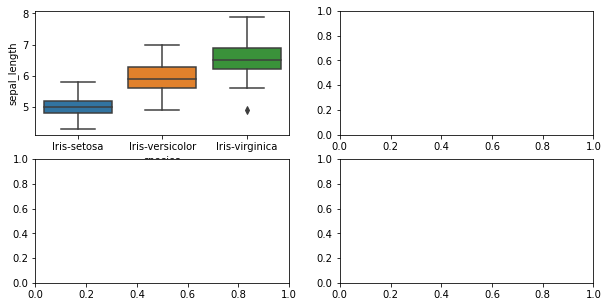

In [15]:
fig,axs=plt.subplots(2,2)
cn="Iris-setosa","Iris-versicolor" ,"Iris-virginica"
sns.boxplot(x='species',y='sepal_length',data=data,order=cn,ax=axs[0,0]);

<AxesSubplot:>

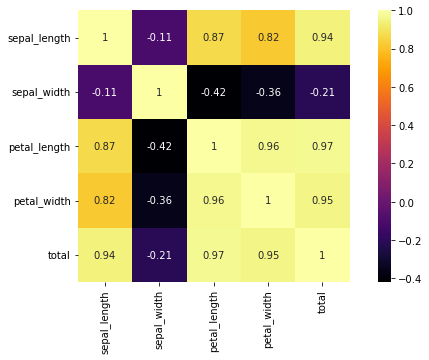

In [16]:
corrmat=data.corr()
sns.heatmap(corrmat,cmap='inferno',annot=True,square=True)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

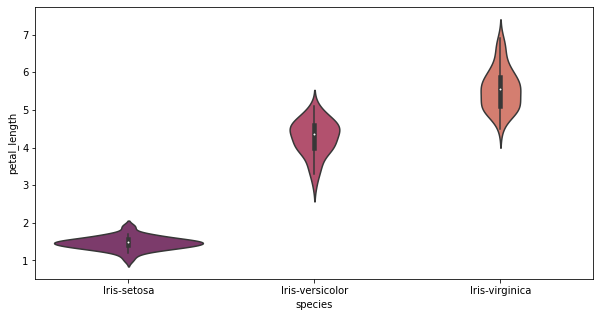

In [17]:
sns.violinplot(x="species",y="petal_length",data=data,size=5,order=cn,palette="flare_r")

C:\Users\yuvarani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

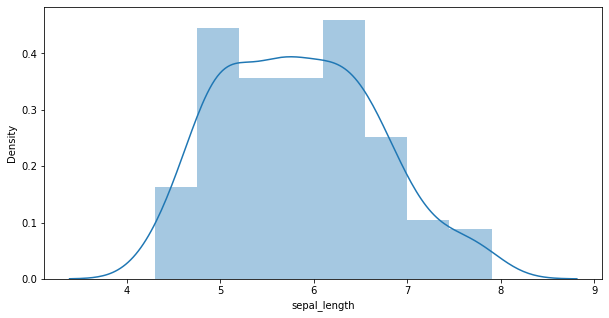

In [18]:
sns.distplot(data["sepal_length"])

Text(0.5, 0, 'count pred')

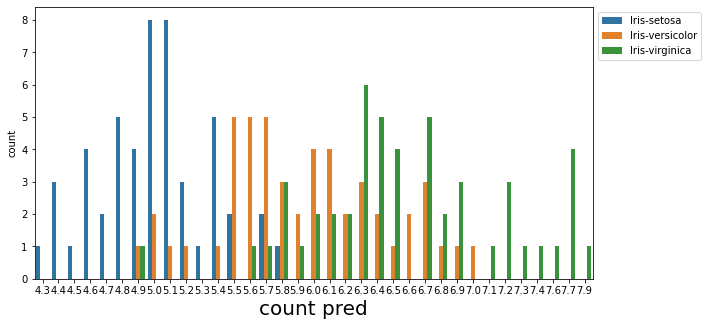

In [19]:
vplt1=sns.countplot(data=data,x="sepal_length",hue="species")
vplt1.legend(bbox_to_anchor=(1,1),loc="upper left")
vplt1.set_xlabel("count pred",fontsize=20)

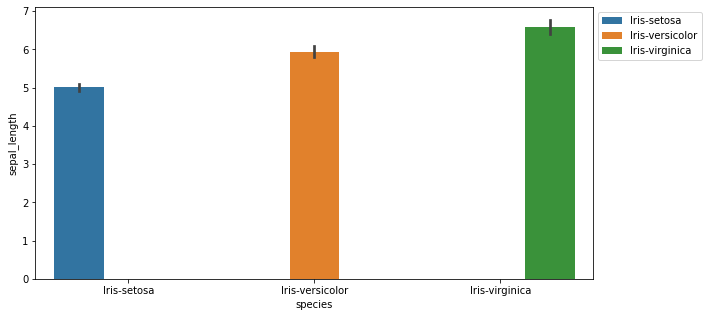

In [20]:
vplt2=sns.barplot(data=data,x="species",y="sepal_length",hue="species")
vplt2.legend(bbox_to_anchor=(1,1),loc="upper left")

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

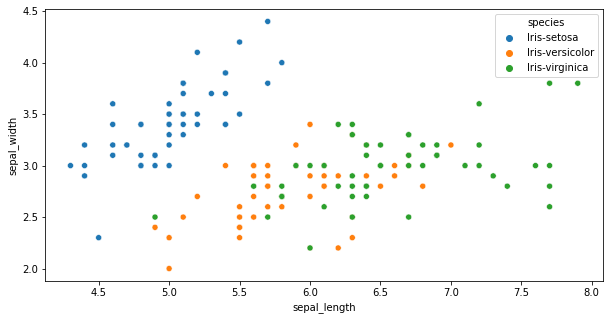

In [21]:
sns.scatterplot(data=data,x="sepal_length",y="sepal_width",hue="species")

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
data1=data.values
X=data1[:,0:4]
y=data1[:,4]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
X_new=np.array([[2.2,3.5,5.5,6.4]])
prediction=knn.predict(X_new)
print("pred:",format(prediction))



pred: ['Iris-virginica']
